In [1]:
# Standard libray
import sys, os
sys.path.append("..")

# Common library
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import uproot

# Custom helper functions
import MuHelper.muhelper.helper_basic as hp

In [28]:
# working_dir = "/mnt/sda2/tofpet_data/function_gen"
working_dir = "/mnt/sda2/tofpet_data/two_preamp"

# Open coincidence txt file

In [84]:
def read_coinc_txt(filename):
    # 6 columns of time, energy, id, time, energy, id
    data = np.loadtxt(filename,usecols=[2,3,4, 7,8,9])
    return data

# filename = f"{working_dir}/data_coinc_14_coinc.dat"
filename = f"{working_dir}/data/data_coinc_test_2_coinc.dat"

data = read_coinc_txt(filename)

ids = np.unique(np.concatenate((data[:,2], data[:,5])))
print(ids)

t1 = data[:,0]
e1 = data[:,1]
id1 = data[:,2]

t2 = data[:,3]
e2 = data[:,4]
id2 = data[:,5]

dt = t1-t2
print(id1[0])
print("Number of events:", len(e1))


[265. 294.]
294.0
Number of events: 10197


Text(0.5, 0, 'Energy')

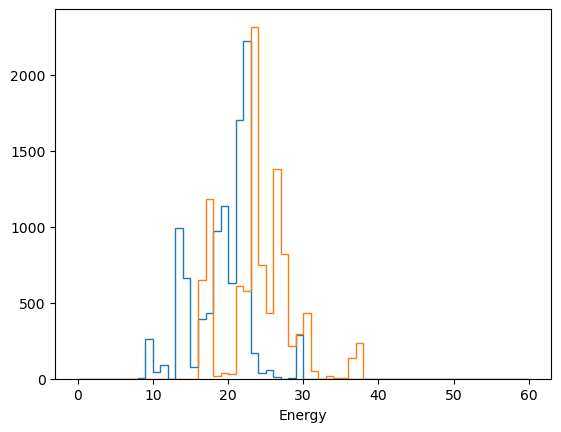

In [85]:
bins=np.linspace(0,60,61)
hist(e1,bins=bins,histtype="step");
hist(e2,bins=bins,histtype="step");
xlabel("Energy")
# yscale("log")

9935


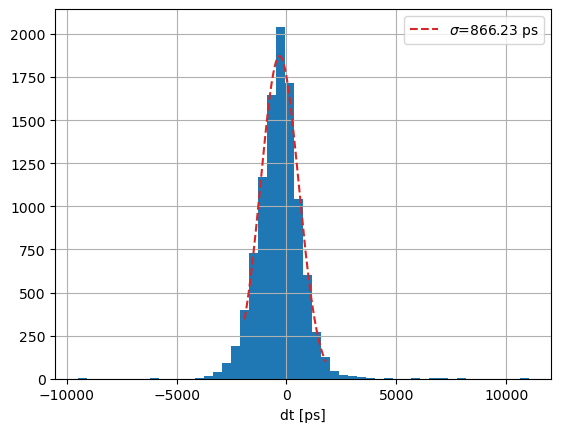

In [86]:
mask = (e1>10) & (e2>10)
print(sum(mask))
# h=hist(dt[mask]/sqrt(2),bins=100, range=(-6000,6000),histtype="step");

h=hist(dt/sqrt(2),bins=50);
popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-2000,2000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()


# yscale('log')
# ylim(1,)

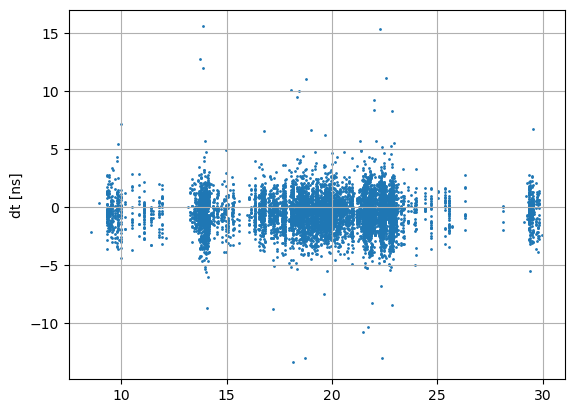

In [87]:
# scatter(e1, dt, s=1)
scatter(e1, dt/1000, s=1)
# xlim(40,55)
# xlabel("Energy [pe]")
ylabel("dt [ns]")
grid()